<a href="https://colab.research.google.com/github/andheartsjaz/capstone_1/blob/master/capstone_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![cover_Do%20they%20like%20me.png](attachment:cover_Do%20they%20like%20me.png)

![Capstone_1_cover.png](attachment:Capstone_1_cover.png)

![capstone_slide_2.png](attachment:capstone_slide_2.png)

![Capstone_slide_3%20%281%29.png](attachment:Capstone_slide_3%20%281%29.png)

![overview_of_data.png](attachment:overview_of_data.png)

![Google_Trends_-_2019-12-11_20.18.44.png](attachment:Google_Trends_-_2019-12-11_20.18.44.png)

![keyword%20data%20science.png](attachment:keyword%20data%20science.png)

![Hypothesis-1.png](attachment:Hypothesis-1.png)

In [0]:

# Source:
# http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [0]:
# setup environment

import math
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

%matplotlib inline

### Let's start by reading-in our data, which comes from <b>Google Trends!</b>(https://trends.google.com/trends/)
<br>
<br>


# Hypothesis: 

# Has interest in Data Science increased or decreased?

# Has interest in Data Science increased or decreased since the release of Harvard Business Review article, naming 'Data Scientist' the sexiest job in the 21st Century?
<br>
<br>


![2012-2014%20Interest%20by%20month.png](attachment:2012-2014%20Interest%20by%20month.png)


In [0]:
df = pd.read_csv(r'C:\Users\jvicc\projects\data\trends_2012_2019.csv', header=0) #if we look at our dataset the 1st row has stuff we don't want
df
df.tail()
df.head()
# df.info

,time,data_scientist,data_science,computer,food
0,2012-01,8,12,100,58
1,2012-02,8,10,93,58
2,2012-03,8,9,90,60
3,2012-04,7,10,88,60
4,2012-05,8,9,90,61


In [0]:
df.isnull().sum()
df.isna().sum()
df.head()

,time,data_scientist,data_science,computer,food
0,2012-01,8,12,100,58
1,2012-02,8,10,93,58
2,2012-03,8,9,90,60
3,2012-04,7,10,88,60
4,2012-05,8,9,90,61


### Before Let's change our data types: make the week date into something more standard and make the level of interest into integers

In [0]:
df['time'].dtype

dtype('O')

In [0]:
df['time'] = pd.to_datetime(df['time']) # shold i use different formatting?
df['time'].head()

0   2012-01-01
1   2012-02-01
2   2012-03-01
3   2012-04-01
4   2012-05-01
Name: time, dtype: datetime64[ns]

### When we first gathered and looked at our data, 
- we had interest level broken down by month only...

#### Procedure We Used:
We needed to change our data into a different type, and, add some columns, manipulate the data, visualize and test results.
        - python, numpy, scipy and pandas:
        - filtering, grouping, sorting
        - aggregations, descriptive stats
        - tests for statistical analysis
    - feature design:
        - year (2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019)
        - month (numerical; 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
        - month (name: Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sept, Oct, Nov, Dec
        - weekday (numerical: 0, 1, 2, 3, 4, 5, 6)
        - weekday (name: Mon, Tues, Wed, Thurs, Fri, Sat, Sun)
        - quarter (financial: 1, 2, 3, 4)
     - visualize discrete features (new columns) as a y-axis variables:
         - Matplotlib and Seaborn libraries
             - Histograms, Bar charts, Line Charts


In [0]:
df.columns = ['date', 'data_scientist', 'data_science', 'computer', 'love']
df.head()

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year



import seaborn as sns

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['weekday'] = df['date'].dt.weekday
df['weekday_name'] = df['date'].dt.weekday_name
df['quarter'] = df['date'].dt.quarter


# Average Interest Level by Day of the Week:
    
##       - "Best Day" for Data Science: Thursday (Avg. 44.85)

##      - "Best Day" for Data Scientist: Monday (Avg. 49.23)
##      - "Worst Day" for Data Science: Wednesday (Avg. 40.00)
##       - "Worst Day" for Data Scientist: Saturday (Avg. 43.92)

![stats%20Copy.png](attachment:stats%20Copy.png)

![stats%20Copy%20%281%29.png](attachment:stats%20Copy%20%281%29.png)

![stats.png](attachment:stats.png)

<Figure size 1080x1152 with 0 Axes>

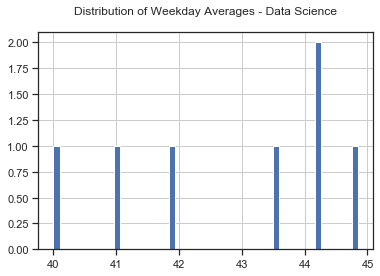

In [0]:
stats1 = df.groupby(['weekday_name'], as_index=False).agg({'data_science': "mean"})
stats2 = stats = df.groupby(['weekday_name'], as_index=False).agg({'data_scientist': "mean"})

# print(round(stats1.sort_values('data_science'),2))


plt.figure(figsize=(15,16))
stats1.hist(bins=50)
plt.title('Distribution of Weekday Averages - Data Science\n')
plt.show();

<Figure size 1440x1440 with 0 Axes>

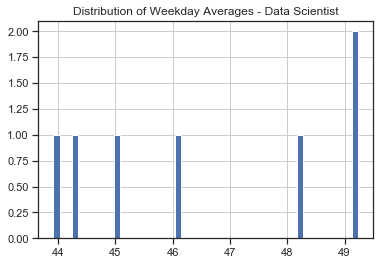

In [0]:
# print(round(stats2.sort_values('data_scientist'),2));


plt.figure(figsize=(20,20))

stats2.hist(bins=50);
plt.title('Distribution of Weekday Averages - Data Scientist')
plt.show();

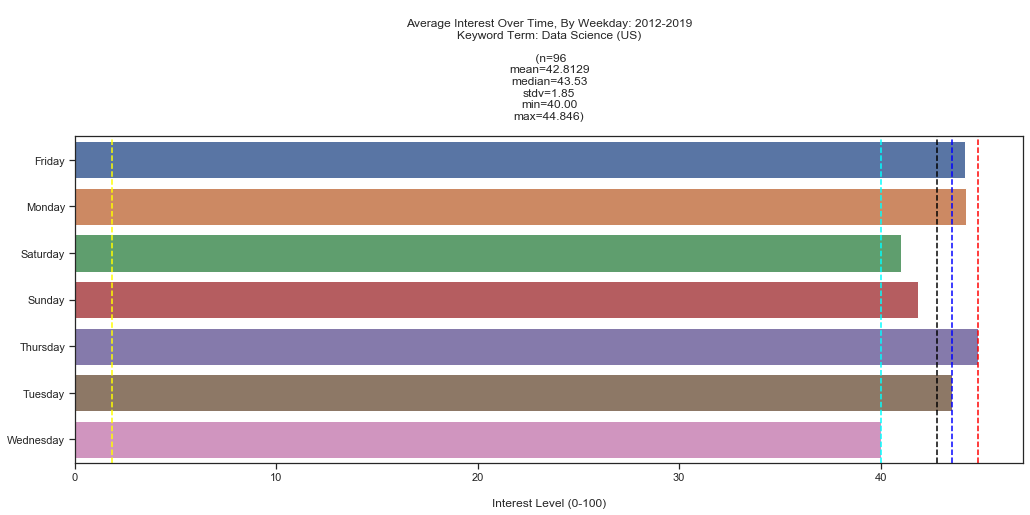

In [0]:
stats = df.groupby(['weekday_name'], as_index=False).agg({'data_scientist': "mean", 'data_science': "mean"})

stats = pd.DataFrame(stats)

# stats = stats.sort_values('weekday_name')
x = stats['data_science'].sort_values()
x1 = stats['data_scientist'].sort_values()
mean1 = x.mean()
y = stats['weekday_name'].sort_values()


plt.figure(figsize=(17,6))

sns.barplot(x=x, y=y, data=stats)
plt.title('\nAverage Interest Over Time, By Weekday: 2012-2019\nKeyword Term: Data Science (US)\n\n (n=96\nmean=42.8129\nmedian=43.53\nstdv=1.85\nmin=40.00\nmax=44.846)\n')
plt.ylabel("")
plt.xlabel("\nInterest Level (0-100)")
plt.axvline(x=mean1, color='black', linestyle='--')
plt.axvline(x=x.median(), color='blue', linestyle='--')
plt.axvline(x=x.std(), color='yellow', linestyle='--')
plt.axvline(x=x.max(), color='red', linestyle='--')
plt.axvline(x=x.min(), color='cyan', linestyle='--')

plt.show()

# print(x.median())
# print(x.sort_values())

# stats['data_science'].mean() 42.8129
# stats['data_scientist'].mean() 46.5744

# print(x.min())
# print(x.max())



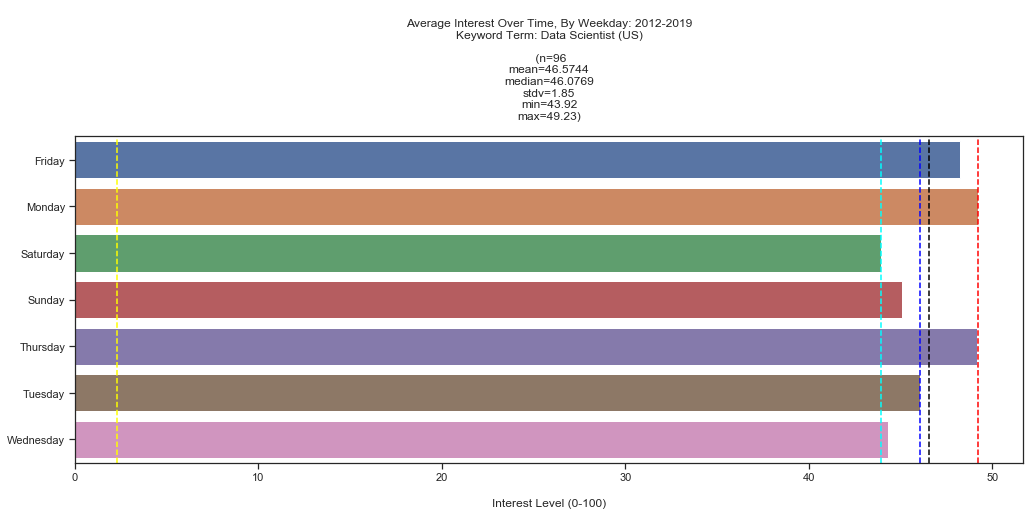

In [0]:
stats = df.groupby(['weekday_name'], as_index=False).agg({'data_scientist': "mean", 'data_science': "mean"})

stats = pd.DataFrame(stats)

# stats = stats.sort_values('weekday_name')
x = stats['data_science'].sort_values()
x1 = stats['data_scientist'].sort_values()
mean1 = x.mean()
mean2 = x1.mean()


plt.figure(figsize=(17,6))

sns.barplot(x=x1, y='weekday_name', data=stats)
plt.title('\nAverage Interest Over Time, By Weekday: 2012-2019\nKeyword Term: Data Scientist (US)\n\n (n=96\nmean=46.5744\nmedian=46.0769\nstdv=1.85\nmin=43.92\nmax=49.23)\n')
plt.ylabel("")
plt.xlabel("\nInterest Level (0-100)")
plt.axvline(x=mean2, color='black', linestyle='--')
plt.axvline(x=x1.median(), color='blue', linestyle='--')
plt.axvline(x=x1.std(), color='yellow', linestyle='--')
plt.axvline(x=x1.max(), color='red', linestyle='--')
plt.axvline(x=x1.min(), color='cyan', linestyle='--')

# plt.legend(('mean', 'median', 'stdv', 'max', 'min'), loc='center')

plt.show()

# print(x1.median())
# print(x.sort_values())

# stats['data_science'].mean() 42.8129
# stats['data_scientist'].mean() 46.5744

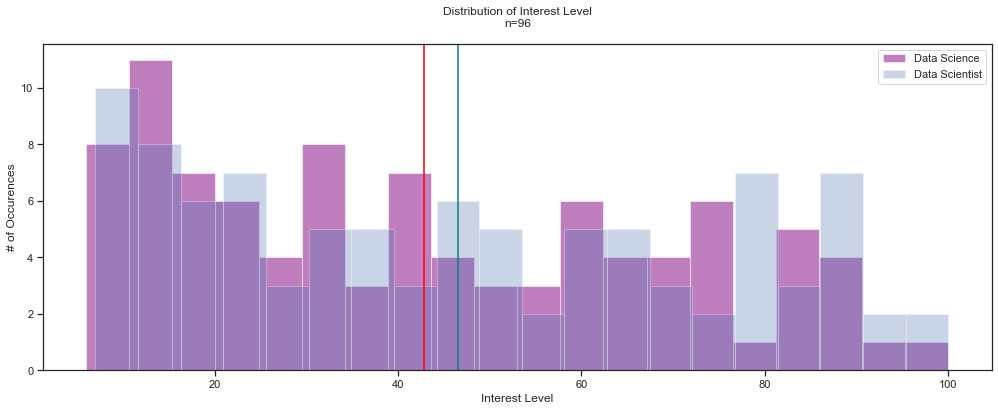

In [0]:
from scipy import stats

plt.figure(figsize=(17,6))

plt.hist(df['data_science'], alpha=.5, bins=20, color='purple');
plt.hist(df['data_scientist'], alpha=.3, bins=20);
plt.xlabel('Interest Level')
plt.ylabel('# of Occurences')
plt.legend(['Data Science', 'Data Scientist'])
plt.axvline(df['data_science'].mean(), color='red', linestyle='-')
plt.axvline(df['data_scientist'].mean(), color='teal', linestyle='-')
plt.title('Distribution of Interest Level\nn=96\n')

plt.show()

mean1 = df['data_science'].mean()

# print(mean1)
# plt.hist(df['computer'], alpha=.5, bins=50)
# plt.hist(df['love'], alpha=.5, bins=50)
# plt.show()

# print(df.shape)

## Unfortunately, Our data is very not normal...
And, if we wanna test our hypothesis, we'll need more data!

But, let's see some more charts to highlight relationships.  Let's look at Averages By Month--

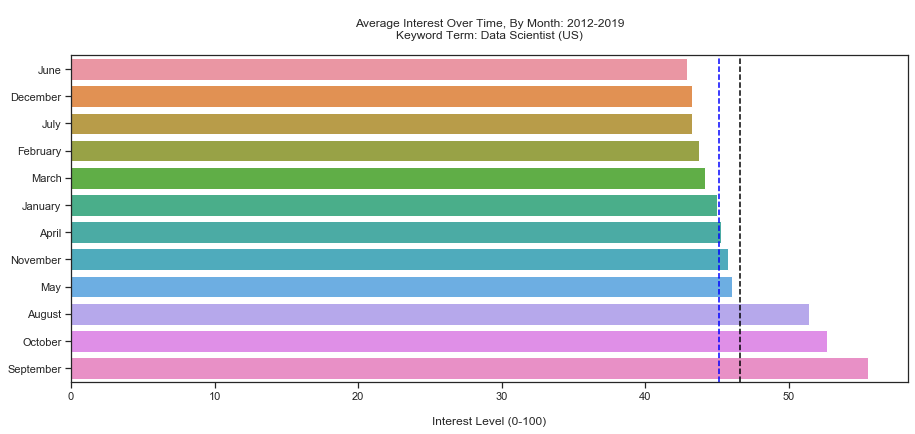

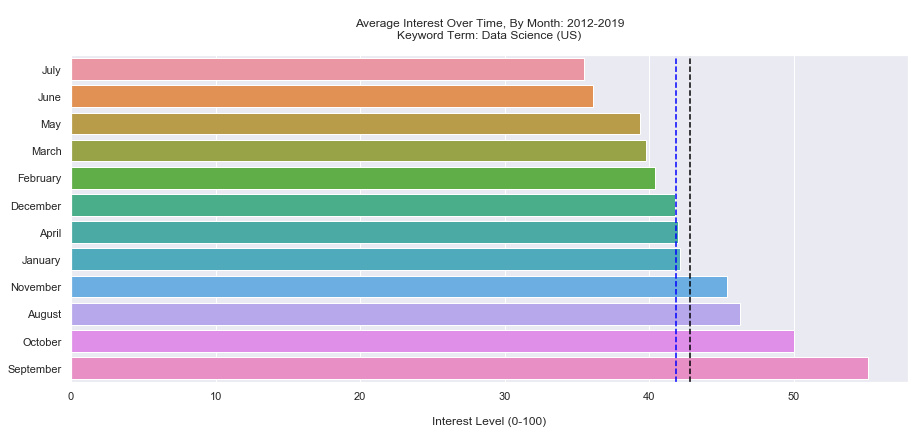

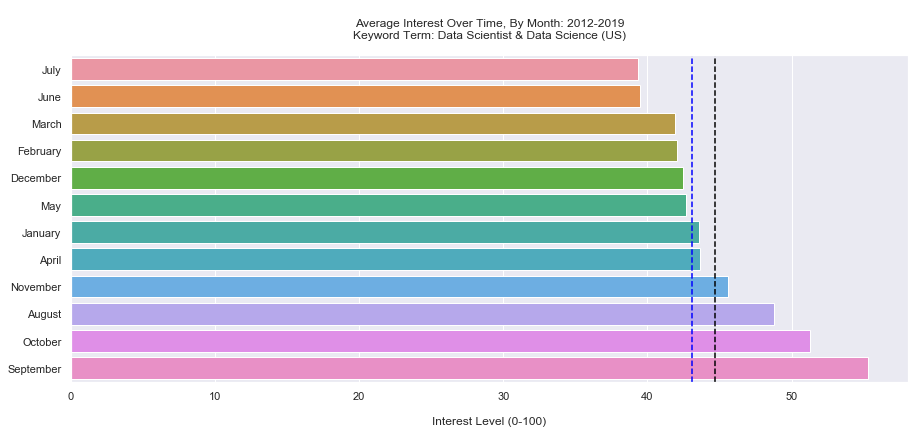

In [0]:

# mean_by_quarter = df.groupby(['quarter']).mean().reset_index()
# mean_by_quarter = mean_by_month.sort_values('quarter')
# mean_by_quarter['data_science'] = abs(mean_by_month['data_science'])

# f, ax = plt.subplots(figsize=(15,6))
# sns.set_style("darkgrid")
# #               {"xtick.major.size":18,
# #                "ytick.major.size":18})

# sns.barplot(x='data_science', y='quarter', data=mean_by_month)
# plt.title('\nAverage Interest Over Time, By Quarter: 2012-2019\nKeyword Term: Data Science (US)\n')
# plt.ylabel("")
# plt.xlabel("\nInterest Level (0-100)")
# plt.show()




mean_by_month = df.groupby(['month_name', 'month']).mean().reset_index()
mean_by_month = mean_by_month.sort_values('data_scientist')
mean_by_month['data_scientist'] = abs(mean_by_month['data_scientist'])

f, ax = plt.subplots(figsize=(15,6))
sns.set_style("darkgrid")
#               {"xtick.major.size":18,
#                "ytick.major.size":18})

sns.barplot(x='data_scientist', y='month_name', data=mean_by_month)
plt.title('\nAverage Interest Over Time, By Month: 2012-2019\nKeyword Term: Data Scientist (US)\n')
plt.ylabel("")
plt.xlabel("\nInterest Level (0-100)")
mean = mean_by_month['data_scientist'].mean()
median = mean_by_month['data_scientist'].median()
plt.axvline(x=mean, color='black', linestyle='--')
plt.axvline(x=median, color='blue', linestyle='--')
plt.show()







mean_by_month = df.groupby(['month_name', 'month']).mean().reset_index()
mean_by_month = mean_by_month.sort_values('data_science')
mean_by_month['data_science'] = abs(mean_by_month['data_science'])

f, ax = plt.subplots(figsize=(15,6))
sns.set_style("darkgrid")
#               {"xtick.major.size":18,
#                "ytick.major.size":18})

sns.barplot(x='data_science', y='month_name', data=mean_by_month)
plt.title('\nAverage Interest Over Time, By Month: 2012-2019\nKeyword Term: Data Science (US)\n')
plt.ylabel("")
plt.xlabel("\nInterest Level (0-100)")
mean = mean_by_month['data_science'].mean()
median = mean_by_month['data_science'].median()
plt.axvline(x=mean, color='black', linestyle='--')
plt.axvline(x=median, color='blue', linestyle='--')
plt.show()






# df['ds_all'] = (df['data_science'] + df['data_scientist']
df['ds_all'] = (df['data_science'] + df['data_scientist']) / 2


mean_by_month = df.groupby(['month_name', 'month']).mean().reset_index()
mean_by_month = mean_by_month.sort_values('ds_all')
mean_by_month['ds_all'] = abs(mean_by_month['ds_all'])

f, ax = plt.subplots(figsize=(15,6))
sns.set_style("darkgrid")
#               {"xtick.major.size":18,
#                "ytick.major.size":18})

sns.barplot(x='ds_all', y='month_name', data=mean_by_month)
plt.title('\nAverage Interest Over Time, By Month: 2012-2019\nKeyword Term: Data Scientist & Data Science (US)\n')
plt.ylabel("")
plt.xlabel("\nInterest Level (0-100)")
mean = mean_by_month['ds_all'].mean()
median = mean_by_month['ds_all'].median()
plt.axvline(x=mean, color='black', linestyle='--')
plt.axvline(x=median, color='blue', linestyle='--')

plt.show()



## The bar graph shows a few things:

### 1. Our month with the highest average level of interest is <b>September</b> in both Keyword categories;
### 2. Our Month with the lowest average level of interest is <b>July</b> in both Keyword categories
### 3. In our control group, June was also the worst month for 'Computer'; January the worst for 'Love'

In [0]:
mean_by_month.sort_values('ds_all')

,month_name,month,data_scientist,data_science,computer,love,year,weekday,quarter,ds_all
5,July,7,43.250,35.500,69.625,73.500,2015.5,3.000,3.0,39.3750
6,June,6,42.875,36.125,68.625,72.000,2015.5,3.625,2.0,39.5000
7,March,3,44.125,39.750,73.375,68.875,2015.5,3.500,1.0,41.9375
3,February,2,43.750,40.375,75.750,67.000,2015.5,3.250,1.0,42.0625
2,December,12,43.250,41.750,73.875,69.625,2015.5,3.750,4.0,42.5000
8,May,5,46.000,39.375,69.750,71.250,2015.5,2.375,2.0,42.6875
4,January,1,45.000,42.125,78.625,67.000,2015.5,2.875,1.0,43.5625
0,April,4,45.250,42.000,71.375,69.875,2015.5,3.000,2.0,43.6250
9,November,11,45.750,45.375,73.250,70.875,2015.5,3.500,4.0,45.5625
1,August,8,51.375,46.250,74.750,71.750,2015.5,2.500,3.0,48.8125


In [0]:
mean_by_month = df.groupby(['month_name', 'month']).mean().reset_index()
mean_by_month = mean_by_month.sort_values('month')
mean_by_month['ds_all'] = abs(mean_by_month['ds_all'])

# print(mean_by_month)

mean_by_month['ds_all'].mean()
# 44.6875 average interest level 2012-2019 for both categories

mean_by_month['data_science'].mean() 
#42.8215

mean_by_month['data_scientist'].mean()
#46.5625

# 

46.5625

In [0]:
mean_by_year = df.groupby(['year', 'data_scientist']).mean().reset_index()
# mean_by_year = mean_by_year.sort_values('year')
mean_by_year['data_scientist'] = abs(mean_by_year['data_scientist'])

# print(mean_by_year)


## Here we'll see the trend increase by year, validating, visually that interest level in Data Science has increased over time...

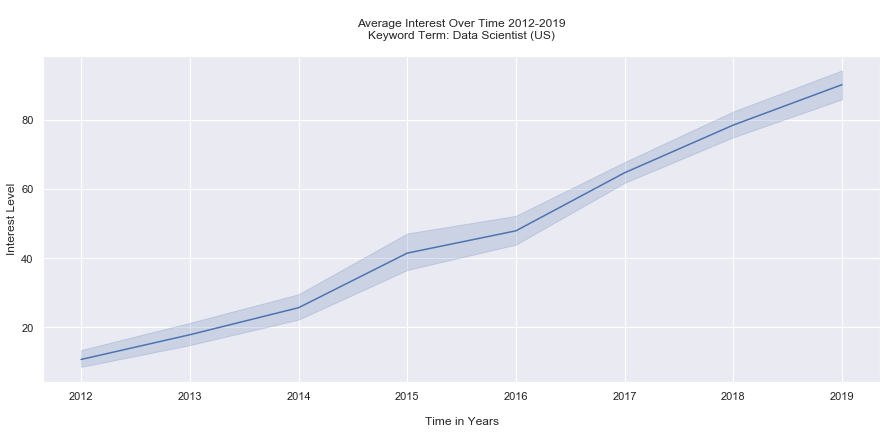

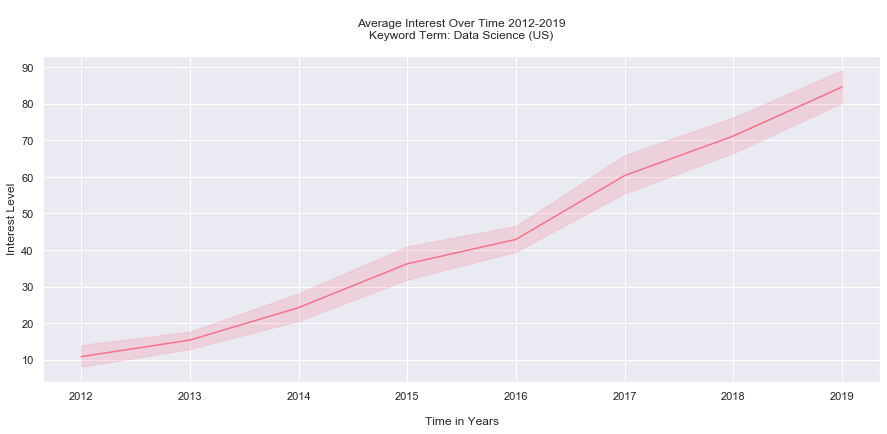

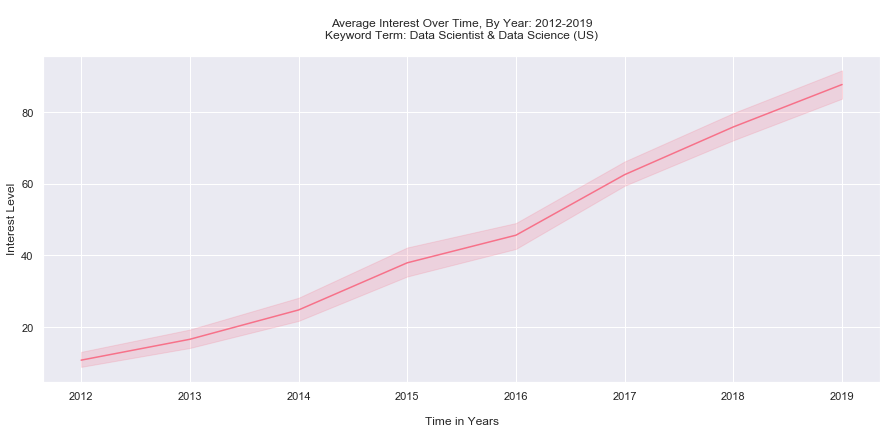

In [0]:
mean_by_year = df.groupby(['year', 'data_scientist']).mean().reset_index()
# mean_by_year = mean_by_year.sort_values('year')
mean_by_year['data_scientist'] = abs(mean_by_year['data_scientist'])

f, ax = plt.subplots(figsize=(15,6))
sns.set_style("darkgrid")
#               {"xtick.major.size":18,
#                "ytick.major.size":18})

sns.lineplot(x='year', y='data_scientist', data=mean_by_year)
sns.set_palette("husl",3) 
plt.title('\nAverage Interest Over Time 2012-2019\nKeyword Term: Data Scientist (US)\n')
plt.ylabel("Interest Level")
plt.xlabel("\nTime in Years")
plt.show()

mean_by_year = df.groupby(['year', 'data_science']).mean().reset_index()
# mean_by_year = mean_by_year.sort_values('year')
mean_by_year['data_science'] = abs(mean_by_year['data_science'])

f, ax = plt.subplots(figsize=(15,6))
sns.set_style("darkgrid")
#               {"xtick.major.size":18,
#                "ytick.major.size":18})

sns.lineplot(x='year', y='data_science', data=mean_by_year)
sns.set_palette("husl",3) 
plt.title('\nAverage Interest Over Time 2012-2019\nKeyword Term: Data Science (US)\n')
plt.ylabel("Interest Level")
plt.xlabel("\nTime in Years")
plt.show()

mean_by_year = df.groupby(['year', 'ds_all']).mean().reset_index()
# mean_by_year = mean_by_year.sort_values('year')
mean_by_year['ds_all'] = abs(mean_by_year['ds_all'])

f, ax = plt.subplots(figsize=(15,6))
sns.set_style("darkgrid")
#               {"xtick.major.size":18,
#                "ytick.major.size":18})

sns.lineplot(x='year', y='ds_all', data=mean_by_year)
sns.set_palette("husl",3) 
plt.title('\nAverage Interest Over Time, By Year: 2012-2019\nKeyword Term: Data Scientist & Data Science (US)\n')
plt.ylabel("Interest Level")
plt.xlabel("\nTime in Years")
plt.show()


<Figure size 1224x720 with 0 Axes>

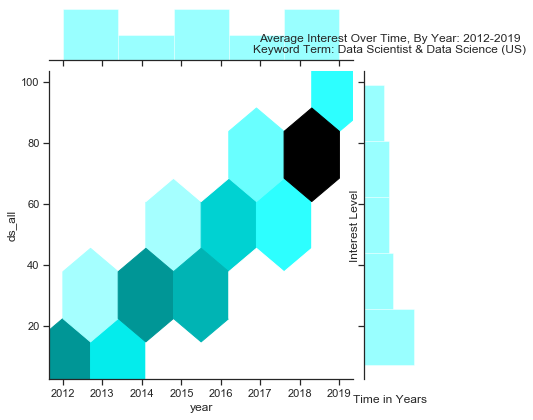

In [0]:
sns.set(style="ticks")

plt.figure(figsize=(17,10))

# rs = np.random.seed(0)
x = df['year']
y = df['ds_all']

sns.jointplot(x, y, kind="hex",
              data=df, 
              color="cyan");
plt.title('\nAverage Interest Over Time, By Year: 2012-2019\nKeyword Term: Data Scientist & Data Science (US)\n')
plt.ylabel("Interest Level")
plt.xlabel("\nTime in Years")
plt.show()


## As we saw above, the charts are pretty, and we see increase over time, which answers our first question. Without normality, our analysis was more focused on the <i>time</i> variable.  However, this did not require much science...we can't test this dataset!

In [0]:
df_12 = df[df['year'] == 2012] # repeat for all years
df_13 = df[df['year'] == 2013]
df_14 = df[df['year'] == 2014]
df_15 = df[df['year'] == 2015]
df_16 = df[df['year'] == 2016]
df_17 = df[df['year'] == 2017]
df_18 = df[df['year'] == 2018]
df_19 = df[df['year'] == 2019]

# df12_g = df_12.groupby(['weekday_name', 'data_scientist', 'data_science']).agg({'data_scientist': "count", 'data_science': "count"})

# df12_g

## Next Hypothesis!--Let's See if we can answer our second question--

![Hypothesis-2.png](attachment:Hypothesis-2.png)

![Data_Scientist_The_Sexiest_Job_of_the_21st_Century_-_2019-12-11_22.08.29.png](attachment:Data_Scientist_The_Sexiest_Job_of_the_21st_Century_-_2019-12-11_22.08.29.png)

# Oh no! looks like we need more years!

# # Our last dataset only had 96 observations 

## To make this hypothesis more testable, we'll need more observations (years) from Google Trends

![keyword%20data%20science%20%282%29.png](attachment:keyword%20data%20science%20%282%29.png)

## Time for some science...! :) 

## Let's complete our analysis and experimentation in Jupyter Notebook.

In [0]:
df_1 = pd.read_csv(r'C:\Users\jvicc\projects\capstone_1\data\trends_2004_2019.csv', skiprows=1)
df_1
# print(df_1)
df_1['Month'] = pd.to_datetime(df_1['Month'])
df_1['year'] = df_1['Month'].dt.year
# print(df_1) 
# df_1['data scientist: (United States)']

# df_1.shape



## Adding in data from 2004, we now have 192 observations! 

## For clarity, we'll stick with the Keyword "Data Scientist" to centralize our analysis within the context of career/job title vs. the subject itself.

## Let's make two groups: 
### Group A will be before the Harvard Business Review Article (n=106)
#### <i>"All interest levels, by month, for 'Data Scientist' from Jan 1. 2004 until Oct 1. 2012"</i>
### Group B will be after the Harvard Business Review Article (n=86)
#### <i>"All interest levels, by month, for 'Data Scientist' from Nov 1. 2012 until Dec 1. 2019"</i>


### Can we see if there's any difference in the numbers--

In [0]:

df_1

# establish before and after

# 2004 - Oct 2012 is group A
# Nov 2012 - Dec 2019 is group B

# make a something for group a and b

# use filter statement

group_a = df_1[df_1['Month'] <= '2012-10-01']
group_b = df_1[df_1['Month'] >= '2012-11-01']

# print(group_a) # 106
# print(group_b) # 86



Here are our stats for Group A: 

count    106.000000<br>
mean       2.792453<br>
std        2.728045<br>
min        0.000000<br>
25%        1.000000<br>
50%        2.000000<br>
75%        3.000000<br>
max       17.000000<br>

Here are our stats for Group B:

count     86.000000<br>
mean      50.441860<br>
std       25.564039<br>
min       10.000000<br>
25%       27.500000<br>
50%       47.500000<br>
75%       75.500000<br>
max      100.000000<br>


In [0]:
print(group_a['data scientist: (United States)'].describe())

print(group_b['data scientist: (United States)'].describe())

count    106.000000
mean       2.792453
std        2.728045
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       17.000000
Name: data scientist: (United States), dtype: float64
count     86.000000
mean      50.441860
std       25.564039
min       10.000000
25%       27.500000
50%       47.500000
75%       75.500000
max      100.000000
Name: data scientist: (United States), dtype: float64


### Above we can see the difference in mean in the two groups.  Let's see how this is visualized in a box plot:

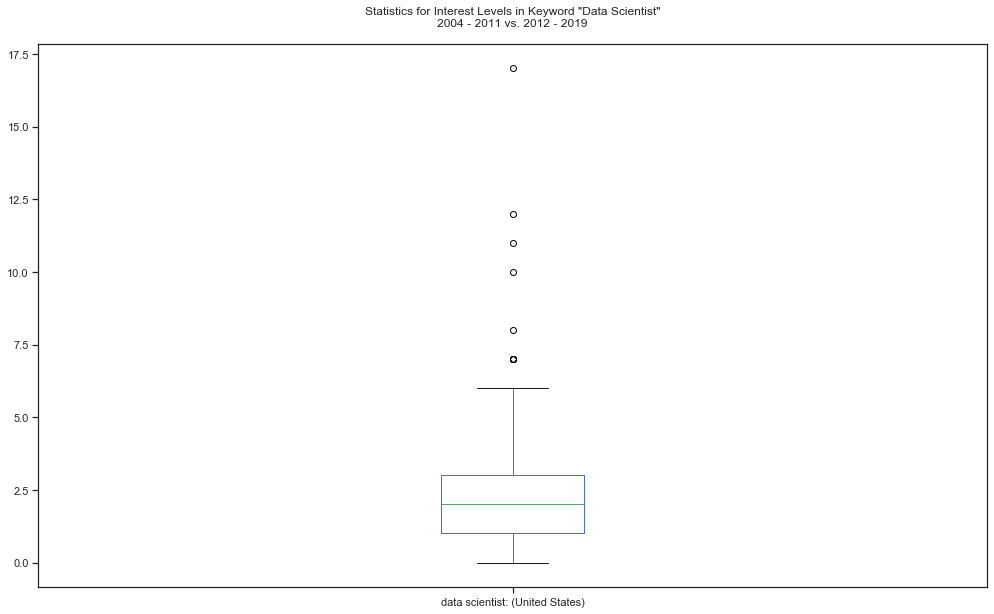

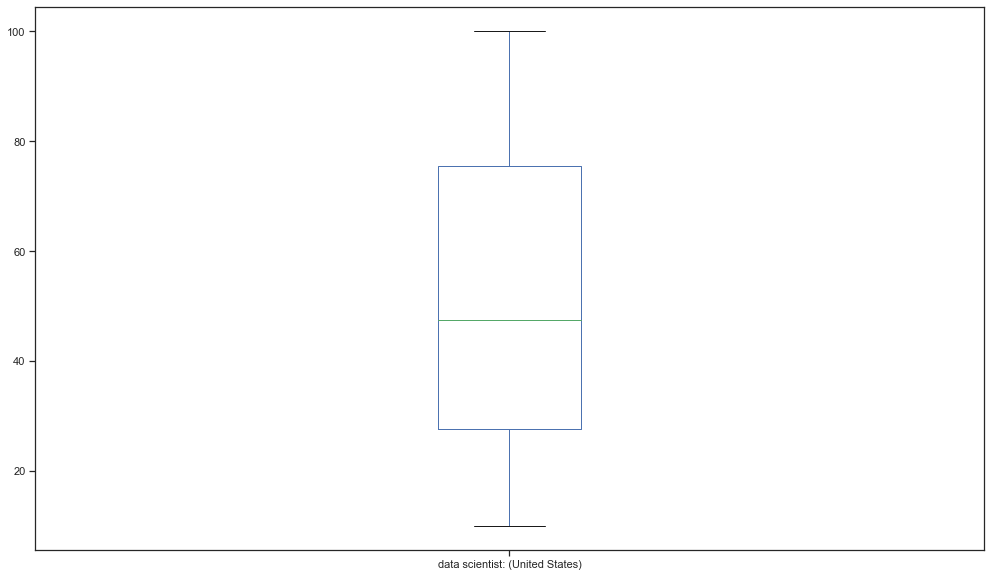

In [0]:
plt.figure(figsize=(17,10))


plt.title ('Statistics for Interest Levels in Keyword "Data Scientist"\n2004 - 2011 vs. 2012 - 2019\n')

group_a['data scientist: (United States)'].plot.box(meanline=True);
plt.show()


plt.figure(figsize=(17,10))

group_b['data scientist: (United States)'].plot.box(meanline=True);

plt.show()

### Our box plots show us two things: 

1) in the first boxplot we see a lot of outliers! 
- This could be due to the fact that as our x-axis (time) increases, we see a increase in interest levels

2) In our second box plot, we see no outliers. 

- Perhaps this means there's not only an increase in interest level,
   but also more years where interest levels were 
   higher than the average seen before the HBR article in 2012.
<br>
<br>


## Let's test for normality across groups--

### First let's plot histograms for group's a and b--

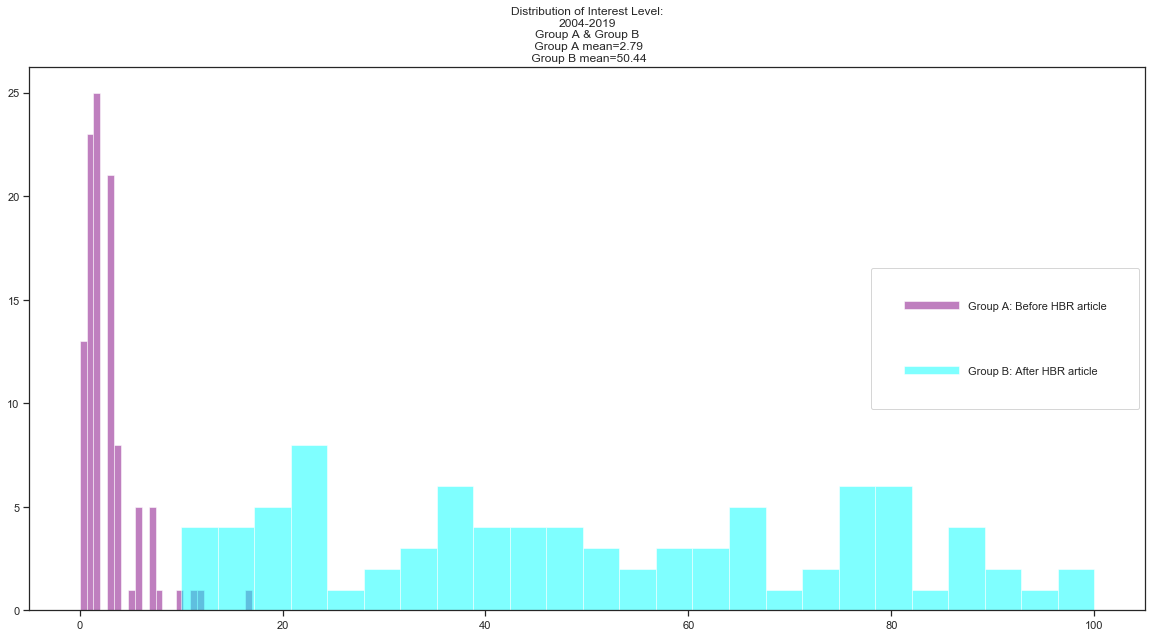

In [0]:
plt.figure(figsize=(20,10))

plt.hist(group_a['data scientist: (United States)'], bins=25, alpha= .5, color='purple')
plt.hist(group_b['data scientist: (United States)'], bins=25, alpha= .5, color='cyan')
# ax.vlines(x=group_a['data scientist: (United States)'].mean(), color='black', linestyle='--')


plt.title('Distribution of Interest Level:\n2004-2019\nGroup A & Group B\n Group A mean=2.79\n Group B mean=50.44')
plt.legend(labels=['Group A: Before HBR article','Group B: After HBR article'], 
           loc='right', 
           handlelength=5, 
           borderpad=3, labelspacing=5)

plt.show()

### The distributions of both groups look not normal. 

### So let's confirm this by printing out some descriptive statistics.

In [0]:
data_nobs = len(group_a['data scientist: (United States)'])
data_mean = group_a['data scientist: (United States)'].mean()
data_min = group_a['data scientist: (United States)'].min()
data_max = group_a['data scientist: (United States)'].max()
data_var = group_a['data scientist: (United States)'].var()
data_skew = group_a['data scientist: (United States)'].skew()
data_kurtosis = group_a['data scientist: (United States)'].kurtosis()


print("Group A: Pre-Harvard Business Review Article - Jan 1 2004 - Oct 1 2012\n\n")
print("N (Sample Size): {}".format(round(data_nobs,2)))
print("Mean: {}".format(round(data_mean,2)))
print("Min: {}".format(round(data_min,2)))
print("Max: {}".format(round(data_max,2)))
print("Variance: {}".format(round(data_var,2)))
print("Skewness: {}".format(round(data_skew,2)))
print("Kurtosis: {}".format(round(data_kurtosis,2)))


Group A: Pre-Harvard Business Review Article - Jan 1 2004 - Oct 1 2012


N (Sample Size): 106
Mean: 2.79
Min: 0
Max: 17
Variance: 7.44
Skewness: 2.32
Kurtosis: 7.67


In [0]:
# print(stats.describe(group_a['data scientist: (United States)']))
# print(stats.describe(group_b['data scientist: (United States)']))


# THANK YOU FRANCISCO FOR THE CODE!!

data_nobs = len(group_b['data scientist: (United States)'])
data_mean = group_b['data scientist: (United States)'].mean()
data_min = group_b['data scientist: (United States)'].min()
data_max = group_b['data scientist: (United States)'].max()
data_var = group_b['data scientist: (United States)'].var()
data_skew = group_b['data scientist: (United States)'].skew()
data_kurtosis = group_b['data scientist: (United States)'].kurtosis()

print("Group B: Post-Harvard Business Review Article - Nov 1 2012 - Dec 1 2019\n\n")
print("N (Sample Size): {}".format(round(data_nobs,2)))
print("Mean: {}".format(round(data_mean,2)))
print("Min: {}".format(round(data_min,2)))
print("Max: {}".format(round(data_max,2)))
print("Variance: {}".format(round(data_var,2)))
print("Skewness: {}".format(round(data_skew,2)))
print("Kurtosis: {}".format(round(data_kurtosis,2)))


Group B: Post-Harvard Business Review Article - Nov 1 2012 - Dec 1 2019


N (Sample Size): 86
Mean: 50.44
Min: 10
Max: 100
Variance: 653.52
Skewness: 0.13
Kurtosis: -1.22


## Again, these results are not in line with normality-- perhaps we can use further methods to test for normality--

In [0]:
from scipy import stats

In [0]:
a = group_a['data scientist: (United States)']
k, p = stats.normaltest(a)


alpha = 1e-3
print("p = {:g}".format(p))


if p < abs(alpha):  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
    
else:
        print("The null hypothesis cannot be rejected")

p = 6.21744e-16
The null hypothesis can be rejected


### Given that our test confirms an extremely low level of significance (p=6.21e-16), we're rejecting the null hypothesis.

### we should reconsider answering our original question...

### It's very likely that the observations seen in the experiment are not reflective of the population.

### But to be sure, let's perform on last test to confirm our results further

### We can further test this result by using the Shapiro-Wilk Test for Normality:

In [0]:
a = group_a['data scientist: (United States)']
b = group_b['data scientist: (United States)']

print(stats.shapiro(a))
print(stats.shapiro(b))

(0.7772022485733032, 2.212199694262562e-11)
(0.9482437372207642, 0.0017514812061563134)


### Results

A <b>Shapiro-Wilk</b> test confirms that unfortunately, 
if we were to use the raw Google Trends data to answer our original questions, 
the likelihood of our observations reflecting in truth in the general population,
that our data is showing a statistically significant increase in trend is <1%.

<i>p-value = 2.212...e-11</i>
<br>
<br>

# Conclusion/Discussion:

<b> - Based on this research, it's more clear that relying on raw data from Google Trends is not a scientifically-backed decision-maker</b>

- Motivations
    - validation
    - Socio-economic
    - Bio-cognitive<sup>1</sup> <i>(demonstrates how thoughts and their biological expression coemerge within a cultural history)</i>
        - Imposter Syndrome
    - Philosophical - Metaphysics 
        - "What's real and what's not?"
        - How differentiated is the human from it's machine/the internet?
    - Scientific/Technological
        - Quantization<sup>2</sup>
        - Geographic Information intelligence
        - Stationarity of Time-Series Data
       

# Conclusion/Discussion Cont'd:

- Opportunities for further research
     - Would like to add a map of the country
     - more "time buckets"
     
- Biases 
  - Search Engine Market Share 
  - Radical Anonymity 
  
- Shifts in Perspectives
   - As communication and spread of information has increased...
   ...our reliance on the internet to debunk life's mysteries should be examined on a interpersonal level.

## Conclusion:

We've discovered that, using our hypothesis as a guide: has interest in Data Science increased or decreased since the release of the Harvard Business Review article in Oct. 2012--that our hypothesis must be rejected.  Since the difference between Group A--before the HBR article, and Group B--afer the HBR article has been tested, our p-value indicates that the observations seen in these Groups are not statistically significant enough to substantiate the use of Google Trends data to validate their use.

Since we are only looking at Google Trends data for the search term "Data Science" only, there may be the bias that we are not collecting enough data on the entire picture that should be captured if we are to truly attempt investigating the status quo of the general public's stance on issues and topics.  Additionally, this experiment may lead to the bias of non-representative sample size given that the data only reflects the search volume from the United States and only from Google data, which only represents a specific fraction of the internet search engine market share. 

It may be useful to tie in other variables like other keywords or other points within the time-series that might help normalize the sample data where we could then perform other tests.

The experimenter found the results slightly telling, as it's hard to stomach knowing that so much of our reality is based on our perception of Google, the capabilities of the search bar, and thinking, perhaps in error, genuine wishes or the reflection of it can be seen just by observing whether or not it's searched for on Google. 

Sources:

Raw Data - Interest Level over Time:

"Google Trends Data - Search Term: Data Scientist, January 1, 2004 - December 1, 2019; Interest over Time
(https://trends.google.com/trends/explore?date=2004-01-01%202019-12-01&geo=US&q=data%20scientist)

"Google Trends Data - Search Term: Data Science, January 1, 2004 - December 1, 2019; Interest over Time
(https://trends.google.com/trends/explore?date=2004-01-01%202019-12-01&geo=US&q=data%20science)

"Google Trends Data - Search Term: Data Science vs. Data Scientist, January 1, 2004 - December 1, 2019; Interest over Time"
(https://trends.google.com/trends/explore?date=2004-01-01%202019-12-01&geo=US&q=data%20science,data%20scientist)

"<sup>1</sup>Biocognitive
https://www.biocognitive.com/index.php/philosophy/page.html)

"<sub>2</sub>Quantization"
https://www.sciencedirect.com/topics/engineering/quantisation

GIS data:

"Google Trends Data - Search Term: Data Scientist, January 1, 2004 - December 1, 2019; Interest by SubRegion
https://trends.google.com/trends/explore?date=2004-01-01%202019-12-01&geo=US&q=data%20scientist

"Google Trends Data - Search Term: Data Science, January 1, 2004 - December 1, 2019; Interest by SubRegion
https://trends.google.com/trends/explore?date=2004-01-01%202019-12-01&geo=US&q=data%20science

